In [1]:
import matplotlib
import scipy.io
import numpy as np
import random
from matplotlib import pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider
from IPython.display import display
from ipywidgets import interact, FloatSlider, VBox, HBox
from IPython.display import display
from matplotlib.patches import Circle

In [24]:
# Known data
G = 0.14 # Nms
I = 0.15 # kgm^2
tau = 60 # ms
# geometry
l_forearm = 33 # cm - wrist-elbow
l_arm = 30 # cm - elbow-shoulder
# targets
r = 18 # cm
t = 0.6 # s - time reaching movement


In [25]:
# x[k+1] = A*x[k] + B*u[k]

# choose data for the state
theta = 45 # degrees (pi/4)
vel = r/t # cm/s
theta_dot = vel/l_forearm # rad/s
T = 0.5 # Ncm - random value
print("linear velocity : ", vel)
print("angular velocity : ", theta_dot)

# state vector x 
x = np.array((theta, theta_dot, T)).reshape(3,1)
print("state vector : ","\n", x)

# inputs u
u = 1
u = np.heaviside(u,1)
print("input : ", u)

linear velocity :  30.0
angular velocity :  0.9090909090909091
state vector :  
 [[45.        ]
 [ 0.90909091]
 [ 0.5       ]]
input :  1.0


In [4]:
A = np.array([0,1,0,0,(-G/I),1/I,0,0,(-1/tau)]).reshape((3,3))
print("A matrix : ","\n",A)

A matrix :  
 [[ 0.          1.          0.        ]
 [ 0.         -0.93333333  6.66666667]
 [ 0.          0.         -0.01666667]]


In [5]:
B = np.array([0,0,(1/tau)]).reshape((3,1))
print("B matrix : ","\n", B)

B matrix :  
 [[0.        ]
 [0.        ]
 [0.01666667]]


In [6]:
# model implementation for single joint case and single reaching movement
# x[k+1] = A*x[k] + B*u[k]

y = np.matmul(A,x) + B*u
print("angular velocity : ", y[0], " corresponds to the initial computed value")
print("angular acceleration : ", y[1])
print("torque derivative : ", y[2])

angular velocity :  [0.90909091]  corresponds to the initial computed value
angular acceleration :  [2.48484848]
torque derivative :  [0.00833333]


[30.000000000000004, 42.42640687119285]


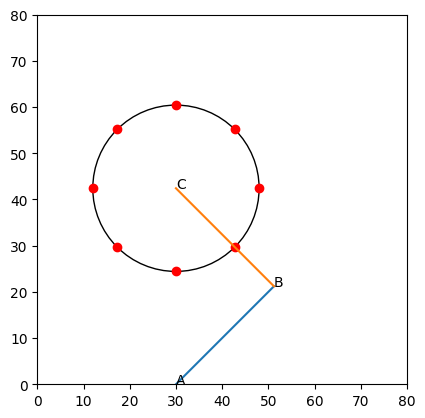

In [45]:
# plot

A = [30,0]
theta_shoulder = np.pi/4 # deg
theta_elbow = 3*np.pi/4 # deg
# compute joint positions 
B = [0,0]
B[0] = A[0] + np.cos(theta_shoulder) * l_arm
B[1] = A[1] + np.sin(theta_shoulder) * l_arm
C = [0,0]
C[0] = B[0] + np.cos(theta_elbow) * l_forearm
C[1] = B[1] + np.sin(theta_elbow) * l_forearm

print(C)

circle_points = []
circle_radius = 18
num_points = 8
angle_step = 360.0 / num_points

for i in range(num_points):
    angle = np.deg2rad(i * angle_step)
    x = C[0] + circle_radius * np.cos(angle)
    y = C[1] + circle_radius * np.sin(angle)
    circle_points.append([x, y])

# figure 
fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box')
centre = (C[0],C[1])
ax.add_patch(Circle(centre,18,fill=False))
for i, point in enumerate(circle_points):
    
    plt.plot(point[0], point[1], 'ro')
plt.xlim(0,80)
plt.ylim(0,80)
plt.plot([A[0],B[0]],[A[1],B[1]])
plt.plot([B[0],C[0]],[B[1],C[1]])
labels = ['A','B','C']
plt.text(A[0],A[1],'A')
plt.text(B[0],B[1],'B')
plt.text(C[0],C[1],'C')

plt.show()

C:\Users\afons\AppData\Local\Temp\ipykernel_14544\2804771948.py:9: RuntimeWarning: invalid value encountered in arccos
  alpha = np.arccos(point[0]/AC1)
C:\Users\afons\AppData\Local\Temp\ipykernel_14544\2804771948.py:17: RuntimeWarning: invalid value encountered in arccos
  theta_shoulder = np.arccos(k/AC1) + alpha
posx and posy should be finite values
posx and posy should be finite values


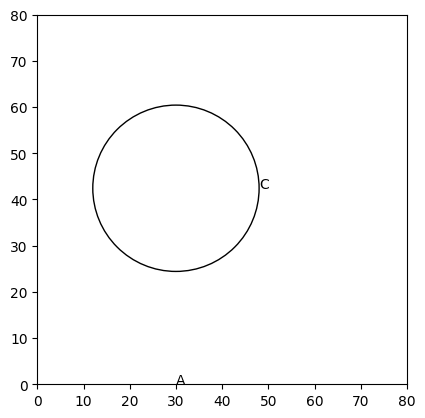

posx and posy should be finite values
posx and posy should be finite values


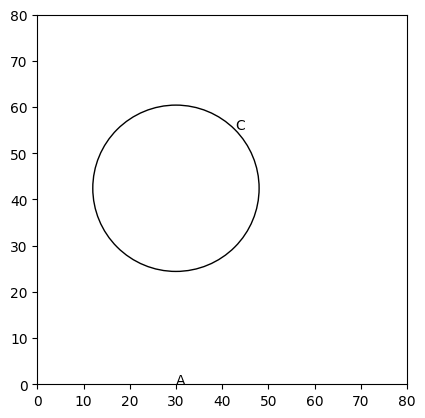

posx and posy should be finite values
posx and posy should be finite values


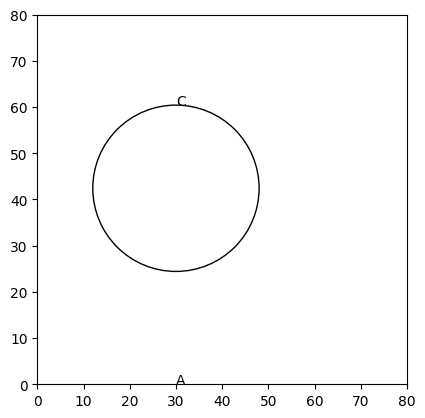

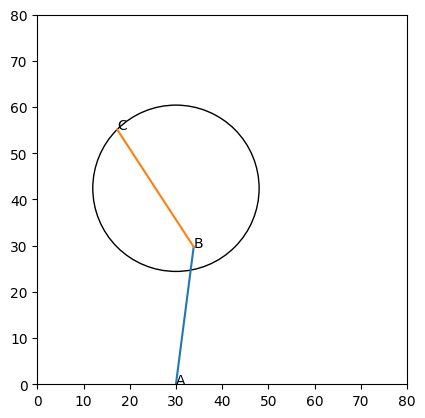

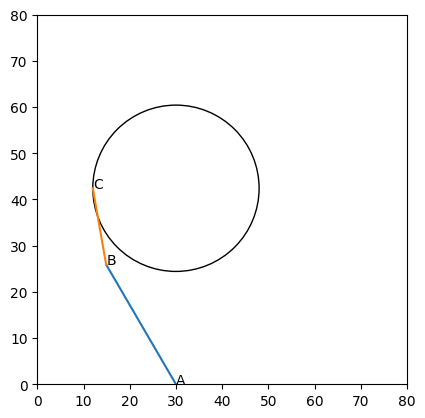

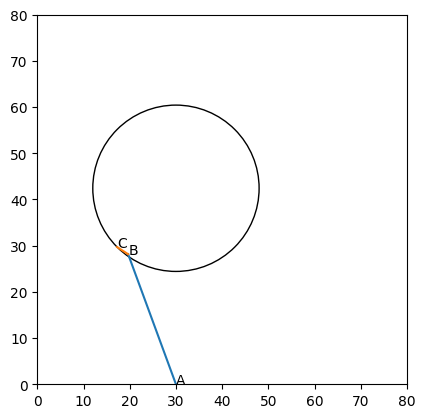

posx and posy should be finite values
posx and posy should be finite values


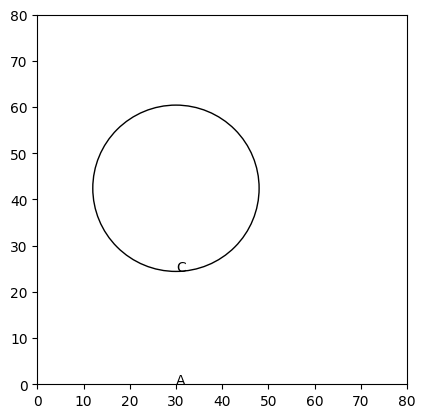

posx and posy should be finite values
posx and posy should be finite values


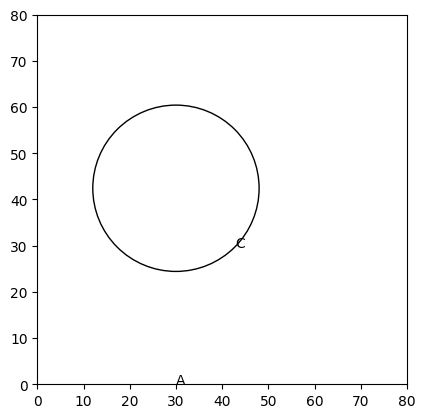

In [69]:
# change position
# constants
# Qk = 0

A = [30,0]
# C1 = [C[0]-18,C[1]]
for point in circle_points:
    # distance A-C1
    AC1 = np.sqrt((point[0]-A[0])**2+(point[1]-A[1])**2)
    # angle between AC and x-axis
    alpha = np.arccos(point[0]/AC1)

    theta_shoulder = 0
    theta_elbow = 0

    # compute angles
    k = (point[0]**2 + point[1]**2 + l_arm**2 - l_forearm**2) / (2*l_arm)
    
    theta_shoulder = np.arccos(k/AC1) + alpha
    theta_elbow = np.arccos((l_arm*np.cos(theta_shoulder)-point[0])/l_forearm)
    # from an inverse kinematics perspective restrain and couple the angles
    
    # compute joint positions

    A = [30,0]
    B = [0,0]
    B[0] = A[0] + np.cos(theta_shoulder) * l_arm
    B[1] = A[1] + np.sin(theta_shoulder) * l_arm


    # check with the figure
    fig, ax = plt.subplots()
    plt.gca().set_aspect('equal', adjustable='box') 
    ax.add_patch(Circle(centre,18,fill=False))
    plt.xlim(0,80)
    plt.ylim(0,80)
    plt.plot([A[0],B[0]],[A[1],B[1]])
    plt.plot([B[0],point[0]],[B[1],point[1]])
    labels = ['A','B','C']
    plt.text(A[0],A[1],'A')
    plt.text(B[0],B[1],'B')
    plt.text(point[0],point[1],'C')

plt.show()


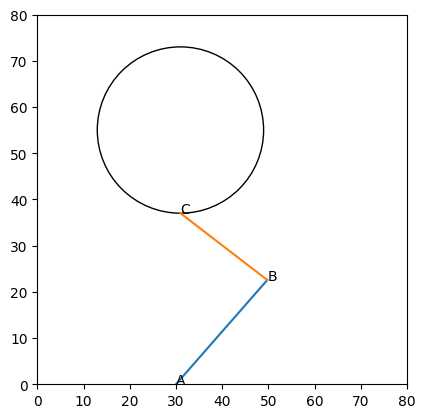

In [9]:
# change position
# constants
A = [30,0]
C2 = [C[0],C[1]-18]
# distance A-C2
AC2 = np.sqrt((C2[0]-A[0])**2+(C2[1]-A[1])**2)
# angle between AC and x-axis
alpha = np.arccos(C2[0]/AC2)

theta_shoulder = 0
theta_elbow = 0

# compute angles
k = (C2[0]**2+C2[1]**2+l_arm**2-l_forearm**2)/(2*l_arm)
theta_shoulder = np.arccos(k/AC2)+alpha
theta_elbow = np.arccos((l_arm*np.cos(theta_shoulder)-C2[0])/l_forearm)

# compute joint positions
A = [30,0]
B = [0,0]
B[0] = A[0] + np.cos(theta_shoulder)*l_arm
B[1] = A[1] + np.sin(theta_shoulder)*l_arm

# check with the figure
fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box') 
ax.add_patch(Circle(centre,18,fill=False))
plt.xlim(0,80)
plt.ylim(0,80)
plt.plot([A[0],B[0]],[A[1],B[1]])
plt.plot([B[0],C2[0]],[B[1],C2[1]])
labels = ['A','B','C']
plt.text(A[0],A[1],'A')
plt.text(B[0],B[1],'B')
plt.text(C2[0],C2[1],'C')

plt.show()

Initial theta :  [45.]
Initial state :  
 [[45.        ]
 [ 0.90909091]
 [ 0.5       ]]


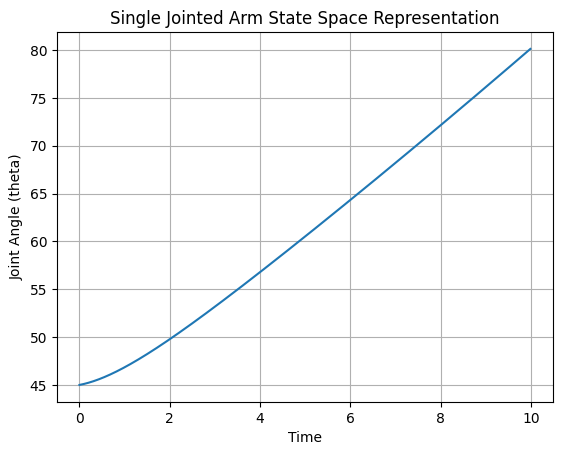

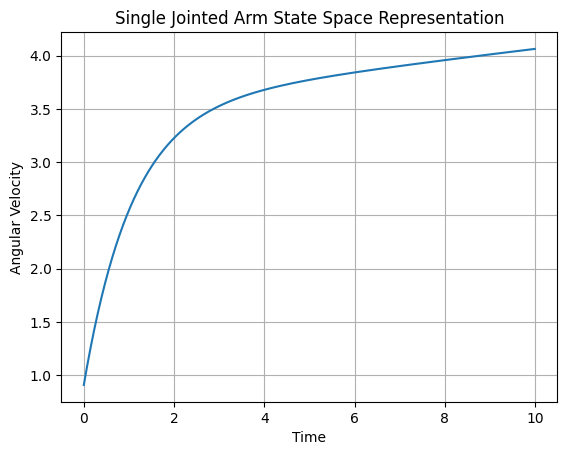

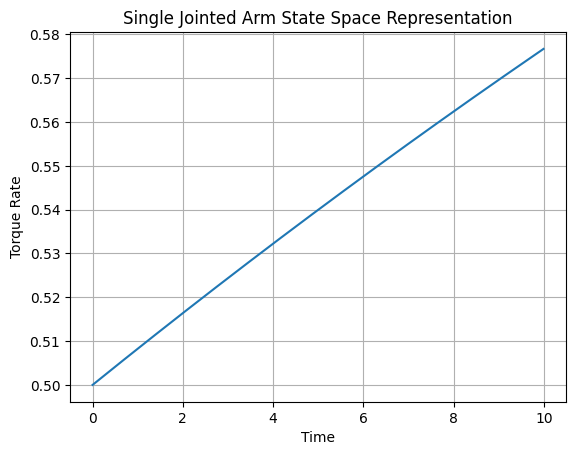

In [10]:
# One Joint Testing
# Initial state
A = np.array([0,1,0,0,(-G/I),1/I,0,0,(-1/tau)]).reshape((3,3))
B = np.array([0,0,(1/tau)]).reshape((3,1))
# x = np.array([[0],[0],[0]])
x = np.array((theta, theta_dot, T)).reshape(3,1)
print("Initial theta : ", x[0])
print("Initial state : ","\n", x)
dt = 0.01
timesteps = 1000

theta_values = []
theta_dot_values = []
torque_rate_values = []
time_values = []

for _ in range(timesteps):
    theta_values.append(x[0])  # Store the joint angle
    theta_dot_values.append(x[1])  # Store the angular velocity
    torque_rate_values.append(x[2])  # Store the torque rate
    time_values.append(_ * dt)  # Store the time
    x_dot = np.matmul(A, x) + np.dot(B, u)  # Calculate x_dot
    x = x + x_dot * dt  # Update the state using Euler's method

# Convert the lists to NumPy arrays for plotting
theta_values = np.array(theta_values)
time_values = np.array(time_values)

# Plot the joint angle over time
plt.plot(time_values, theta_values)
plt.xlabel("Time")
plt.ylabel("Joint Angle (theta)")
plt.title("Single Jointed Arm State Space Representation")
plt.grid(True)
plt.show()

# Plot the angular velocity over time
plt.plot(time_values, theta_dot_values)
plt.xlabel("Time")
plt.ylabel("Angular Velocity")
plt.title("Single Jointed Arm State Space Representation")
plt.grid(True)
plt.show()

# Plot the torque rate over time
plt.plot(time_values, torque_rate_values)
plt.xlabel("Time")
plt.ylabel("Torque Rate")
plt.title("Single Jointed Arm State Space Representation")
plt.grid(True)
plt.show()



In [51]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display

# Define the system matrices A and B
A = np.array([0, 1, 0, 0, (-G/I), 1/I, 0, 0, (-1/tau)]).reshape((3, 3))
B = np.array([0, 0, 1/tau]).reshape((3, 1))

x = np.array([0, 0, 0]).reshape(3, 1)
u = np.array([0])

# Function to update the arm movement based on the input angle (theta)
def update_arm(theta):
    global x  # Declare x as a global variable to update it

    # Simulate the arm movement with a fixed time step
    dt = 0.01
    timesteps = 100
    theta_values = []
    theta_dot_values = []
    torque_rate_values = []

    for _ in range(timesteps):
        theta_values.append(x[0][0])  # Store the joint angle
        theta_dot_values.append(x[1][0])  # Store the angular velocity
        torque_rate_values.append(x[2][0])  # Store the torque rate

        # Calculate x_dot using A, x, and B
        x_dot = np.dot(A, x) + np.dot(B, u)

        # Update the state x using Euler's method
        x = x + x_dot * dt

    # Extract the last calculated theta_dot and T_dot
    theta_dot = theta_dot_values[-1]
    T_dot = torque_rate_values[-1]

    # Clear the previous plot
    plt.clf()

    # Calculate the arm segment endpoints
    x0, y0 = 0, 0
    x1 = np.sin(np.deg2rad(theta))
    y1 = -np.cos(np.deg2rad(theta))

    # Plot the arm segment
    plt.plot([x0, x1], [y0, y1], 'r-')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Arm at θ = {theta} degrees")

    # Plot the last calculated theta_dot and T_dot
    plt.text(0.5, 0.5, f"Theta_dot: {theta_dot:.2f}", fontsize=12)
    plt.text(0.5, 0.4, f"T: {T_dot:.2f}", fontsize=12)

# Create an interactive slider
theta_slider = FloatSlider(value=45.0, min=0, max=360.0, step=1.0, description="θ (degrees)")

# Display the interactive plot
interact(update_arm, theta=theta_slider)
display()


interactive(children=(FloatSlider(value=45.0, description='θ (degrees)', max=360.0, step=1.0), Output()), _dom…

In [67]:
import numpy as np
from scipy.linalg import solve_continuous_are
from scipy.linalg import solve_discrete_are

# Define system dynamics matrices (A, B, C, D)
# A = np.array([[1.0, 0.1], [0.0, 0.9]])
# B = np.array([[0.0], [1.0]])
A = np.array([0, 1, 0, 0, (-G/I), 1/I, 0, 0, (-1/tau)]).reshape((3, 3))
B = np.array([0, 0, 1/tau]).reshape((3, 1))
C = np.array([[1.0, 0.0, 0.0]])
D = np.array([[0.0]])

# Define the state and control dimensions
n = A.shape[0]  # Number of state variables
m = B.shape[1]  # Number of control inputs

# Define the Q and R matrices for the LQR part
Q = np.array([1,0,0,0,5,0,0,0,1]).reshape(3,3)  # State cost matrix
R = np.eye(m)  # Control cost matrix

# Solve the continuous-time Algebraic Riccati Equation for LQR
P = solve_continuous_are(A, B, Q, R)

# Compute the LQR gain matrix
K = np.dot(np.dot(np.linalg.inv(R), B.T), P)

# Define the Q and R matrices for the Kalman filter part
Qk = np.eye(n)  # Process noise covariance matrix
Rk = np.eye(1)  # Measurement noise covariance matrix

# Initial state estimate and covariance
x_hat = np.zeros((n, 1))
P_hat = np.eye(n)

# Define the system input and measurement noise
u = np.zeros((m, 1))
w = np.random.multivariate_normal(mean=np.zeros(n), cov=Qk).reshape(-1, 1)
v = np.random.normal(0, np.sqrt(Rk))

# Simulate the LQG control loop for a number of time steps
num_steps = 100


x_history = np.zeros((n, num_steps))
u_history = np.zeros((m, num_steps))
for _ in range(num_steps):
    # System dynamics (simulate or get actual measurements)
    x = np.dot(A, x_hat) + np.dot(B, u) + w
    y = np.dot(C, x) + v

    # Kalman filter prediction step
    x_hat_pred = np.dot(A, x_hat) + np.dot(B, u)
    P_pred = np.dot(np.dot(A, P_hat), A.T) + Qk

    # Kalman filter update step
    Kk = np.dot(np.dot(P_pred, C.T), np.linalg.inv(np.dot(np.dot(C, P_pred), C.T) + Rk))
    x_hat = x_hat_pred + np.dot(Kk, (y - np.dot(C, x_hat_pred)))
    P_hat = P_pred - np.dot(np.dot(Kk, C), P_pred)

    # LQR control
    u = -np.dot(K, x_hat)

    x_history[:, i] = x_hat.flatten()
    u_history[:, i] = u.flatten()

    # You can apply 'u' to your system here or print it as the control action

# Repeat the above loop for your desired number of time steps


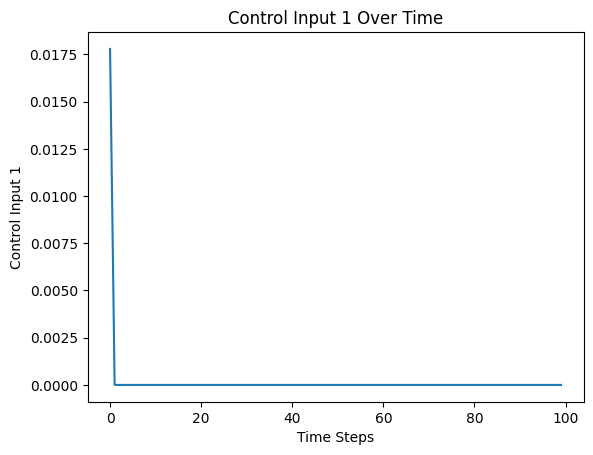

In [68]:

# Plot the state history
time_steps = np.arange(num_steps)
# for i in range(n):
#     plt.figure()
#     plt.plot(time_steps, x_history[i, :])
#     plt.xlabel('Time Steps')
#     plt.ylabel(f'State {i + 1}')
#     plt.title(f'State {i + 1} Over Time')

# Plot the control input history
for i in range(m):
    plt.figure()
    plt.plot(time_steps, u_history[i, :])
    plt.xlabel('Time Steps')
    plt.ylabel(f'Control Input {i + 1}')
    plt.title(f'Control Input {i + 1} Over Time')


# Show the plots
plt.show()
